In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

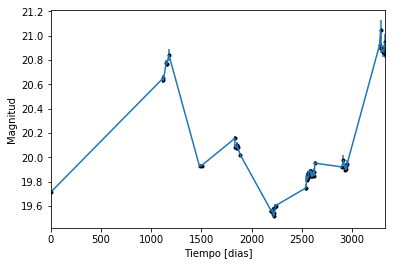

In [2]:
data = np.genfromtxt('LC_18344_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

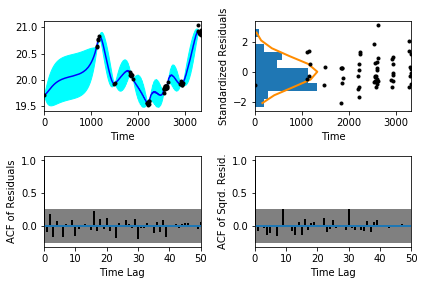

In [5]:
sample.assess_fit()

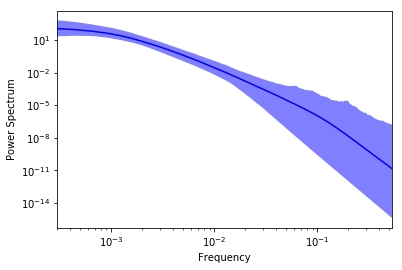

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,0.0663529,'Medida del nivel de ruido')

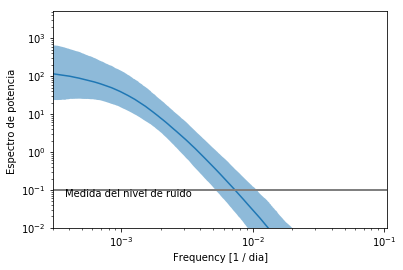

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

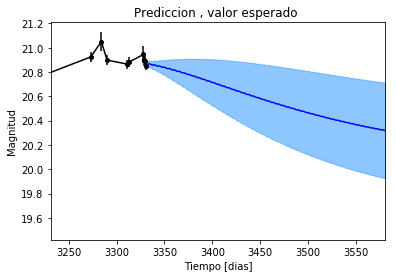

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

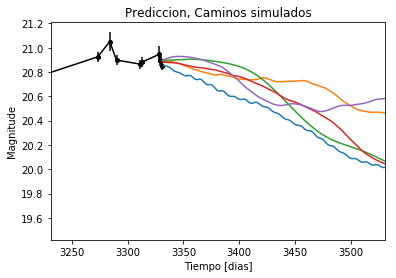

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


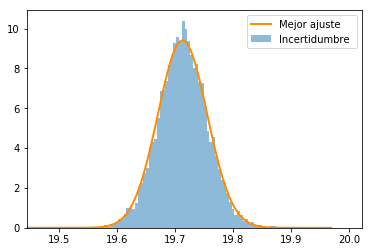

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

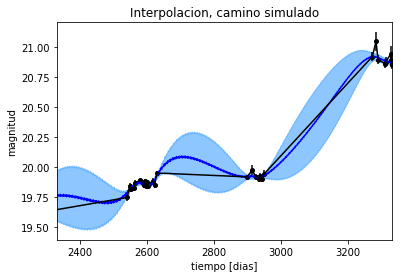

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

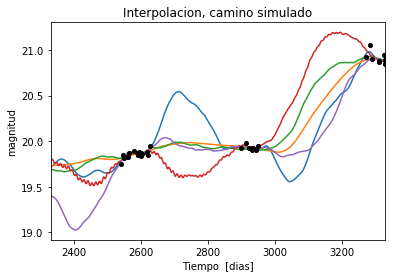

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


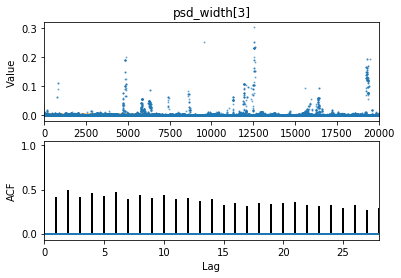

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1001.73333601
Median: 0.0287113401223
Standard deviation: 0.22852514719
68% credibility interval: [ 0.00208316  0.28622057]
95% credibility interval: [  4.42615301e-04   8.72461939e-01]
99% credibility interval: [  3.17585759e-04   1.03178598e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 287.698937978
Median: 0.00261773192181
Standard deviation: 0.100046866593
68% credibility interval: [ 0.00057739  0.03951805]
95% credibility interval: [ 0.00033177  0.31096295]
99% credibility interval: [  3.04611128e-04   7.27342820e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 924.665129088
Median: 0.00427484209852
Standard d

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 548.205589762
Median: 0.00433593277385
Standard deviation: 0.231249027944
68% credibility interval: [ 0.          0.27262656]
95% credibility interval: [ 0.          0.86495229]
99% credibility interval: [ 0.          1.01832827]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 548.205589762
Median: 0.00433593277385
Standard deviation: 0.231249027944
68% credibility interval: [ 0.          0.27262656]
95% credibility interval: [ 0.          0.86495229]
99% credibility interval: [ 0.          1.01832827]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 514.738619305
Median: 0.0
Standard deviation: 0.000401855497317
68% 

Plotting parameter summary


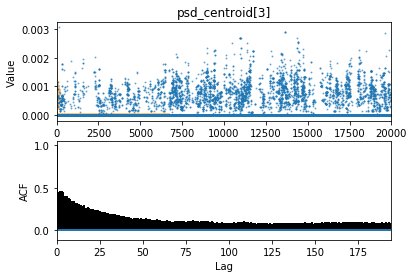

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1112.65201453
Median: 105.10450014
Standard deviation: 1.73655985443
68% credibility interval: [ 103.13554574  106.31263267]
95% credibility interval: [ 100.42728269  107.22012476]
99% credibility interval: [  98.50994319  107.8160648 ]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 575.909179372
Median: 0.723613004269
Standard deviation: 2.15752747028
68% credibility interval: [ 0.05699793  3.78548294]
95% credibility interval: [ 0.01810699  7.30272115]
99% credibility interval: [  0.01219833  10.27271628]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 939.04992163
Median: 0.531011127983
Standard deviation: 8.53553334499
68% credibility interval: [ 0.03109972  6.4004203 ]
95% credibility interval: [  2.69095405e-

In [25]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [26]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 289.692549032
Median: 6.83287127204e-19
Standard deviation: 3.41493059417e+27
68% credibility interval: [  4.28476576e-58   1.22829745e-03]
95% credibility interval: [  2.52302428e-99   2.09461349e+21]
99% credibility interval: [  1.11823973e-112   1.59723328e+028]


In [27]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2566.13642829
Median: 20.1137220956
Standard deviation: 0.258103931705
68% credibility interval: [ 19.90533741  20.32723901]
95% credibility interval: [ 19.60210547  20.6329303 ]
99% credibility interval: [ 19.29447452  20.96281839]


Plotting parameter summary


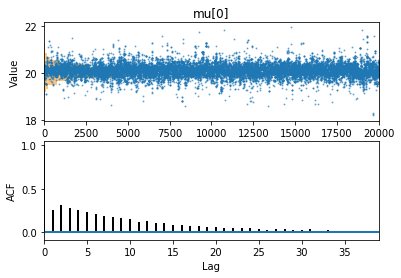

In [29]:
sample.plot_parameter('mu', 0, doShow=True)

In [30]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [31]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 548.205589762
Median: 0.00433593277385
Standard deviation: 0.231249027944
68% credibility interval: [ 0.          0.27262656]
95% credibility interval: [ 0.          0.86495229]
99% credibility interval: [ 0.          1.01832827]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 548.205589762
Median: 0.00433593277385
Standard deviation: 0.231249027944
68% credibility interval: [ 0.          0.27262656]
95% credibility interval: [ 0.          0.86495229]
99% credibility interval: [ 0.          1.01832827]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 514.738619305
Median: 0.0
Standard deviation: 0.000401855497317
68% 

In [32]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1112.65201453
Median: 105.10450014
Standard deviation: 1.73655985443
68% credibility interval: [ 103.13554574  106.31263267]
95% credibility interval: [ 100.42728269  107.22012476]
99% credibility interval: [  98.50994319  107.8160648 ]


In [35]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1705.17378108
Median: 0.24305011435
Standard deviation: 0.294363281217
68% credibility interval: [ 0.14644975  0.44897376]
95% credibility interval: [ 0.09716141  1.03085682]
99% credibility interval: [ 0.07357499  1.81053748]


In [36]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1088.87407497
Median: 1.11577830444
Standard deviation: 0.18867848912
68% credibility interval: [ 0.95310613  1.31861307]
95% credibility interval: [ 0.81835885  1.55649064]
99% credibility interval: [ 0.73673631  1.73920931]


In [37]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 521.894919553
Median: 0.000346796021967
Standard deviation: 0.00731336964878
68% credibility interval: [  1.57864872e-05   4.46195534e-03]
95% credibility interval: [  2.12173722e-25   2.52552139e-02]
99% credibility interval: [  1.07089251e-32   4.17298368e-02]


In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1001.73333601
Median: (-0.180398670406-1.93722037212j)
Standard deviation: 2.04275868592
68% credibility interval: [-1.79837690+0.j -0.01308887+0.j]
95% credibility interval: [ -5.48184004e+00+0.j          -2.78103395e-03-0.38464064j]
99% credibility interval: [ -6.48290253e+00+0.j          -1.99545017e-03-0.00047723j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 287.698937978
Median: (-0.0164476947492+2.39088907135j)
Standard deviation: 1.58313190368
68% credibility interval: [-0.24829924+0.31563166j -0.00362787+0.j        ]
95% credibility interval: [-1.95383785+1.30961514j -0.00208456+0.j        ]
99% credibility interval: [ -4.57002972e+00 +2.97573195e+00j  -1.91392816e-03 +2.38362948e-03j]
Posterior summary for